In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import rasterio as rio

In [2]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

C:\Users\micha\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


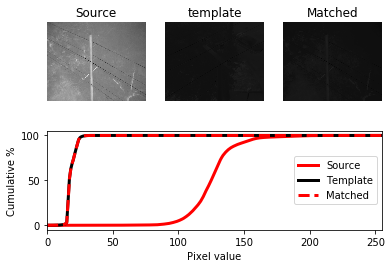

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'ea-applications'))

counter=0

for file in file_path:
    output=glob(os.path.join('data', 'output')+'/*/')

    # Open source and template files
    with rio.open('/Users/micha/ea-applications/data/good-images-hold/mygood15.jpg') as src:
        source = src.read()
        meta=src.profile
    with rio.open('/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/103MEDIA/DJI_0023.jpg') as tmpl:
        template = tmpl.read()
    
    matched = hist_match(source, template)

def ecdf(x):
    """convenience function for computing the empirical CDF"""
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

x1, y1 = ecdf(source.ravel())
x2, y2 = ecdf(template.ravel())
x3, y3 = ecdf(matched.ravel())

fig = plt.figure()
gs = plt.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, :])
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source[0], cmap=plt.cm.gray)
ax1.set_title('Source')
ax2.imshow(template[0], cmap=plt.cm.gray)
ax2.set_title('template')
ax3.imshow(matched[0], cmap=plt.cm.gray)
ax3.set_title('Matched')

ax4.plot(x1, y1 * 100, '-r', lw=3, label='Source')
ax4.plot(x2, y2 * 100, '-k', lw=3, label='Template')
ax4.plot(x3, y3 * 100, '--r', lw=3, label='Matched')
ax4.set_xlim(x1[0], x1[-1])
ax4.set_xlabel('Pixel value')
ax4.set_ylabel('Cumulative %')
ax4.legend(loc=5)


Text(0.5,1,'Matched')

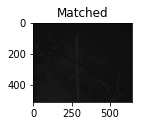

In [4]:
fig = plt.figure()
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
ax3.imshow(matched[0], cmap=plt.cm.gray)
ax3.set_title('Matched')

In [5]:
matched[0].shape
matched.shape

(3, 512, 640)

In [6]:
# https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/export-numpy-array-to-geotiff-in-python/
# write out array to file # no need for meta object

In [7]:
# convert numpy array to same dtype as input. jpeg needs 8 bit data
with rio.open('/Users/micha/ea-applications/data/output/matched1.jpg', 'w', **meta) as dst:
    dst.write(matched.astype(np.dtype('uint8')))    

C:\Users\micha\Anaconda3\lib\site-packages\rasterio\__init__.py:225: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  **kwargs)


In [8]:
filename=[]

In [ ]:
os.chdir(os.path.join(et.io.HOME, 'ea-applications'))
output= glob(os.path.join('data', 'output'))
